# Exercise: Hierarchical Cluster Analysis
You are provided with a dataset containing demographic indicators for 36 European countries. These include variables such as:

- birth and death rates  
- male and female life expectancy  
- total population and population density

Your goal is to uncover clusters of countries that share similar demographic profiles. To do this, proceed as follows:

- Design and implement a **machine learning pipeline** that prepares your data for clustering.
- Use **PCA** to reduce the dimensionality of the data and support your interpretation.
- Apply **hierarchical clustering** to identify meaningful groups of countries.
- Visualize your results using a **dendrogram**, and analyze the outcome.
- Investigate and compare **different linkage methods** (`ward`, `complete`, `average`, etc.). Justify your final choice.
- Characterize each resulting cluster: What do the countries in each group have in common? How do they differ from others?


In [1]:
import pandas as pd

df = pd.read_csv("europe_demo_cleaned.csv")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from scipy.cluster.hierarchy import linkage, dendrogram

In [3]:
# Ensure df is correctly loaded before this step
features = df.drop(['country_name'], axis=1)

In [4]:
country_names = df['country_name']

In [5]:
# Pipeline for standardization and PCA
scaler = StandardScaler()
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pipeline = make_pipeline(scaler, pca)
# Fit the pipeline and transform data
pca_new = pipeline.fit_transform(features)


In [6]:
pca_df = pd.DataFrame(data=pca_new, columns=['PC1', 'PC2'])
pca_df['Country'] = country_names.values


In [12]:
# Explained variance ratio
print(f"Explained variance by PC1: {pca.explained_variance_ratio_[0]:.2f}")
print(f"Explained variance by PC2: {pca.explained_variance_ratio_[1]:.2f}")


Explained variance by PC1: 0.50
Explained variance by PC2: 0.20


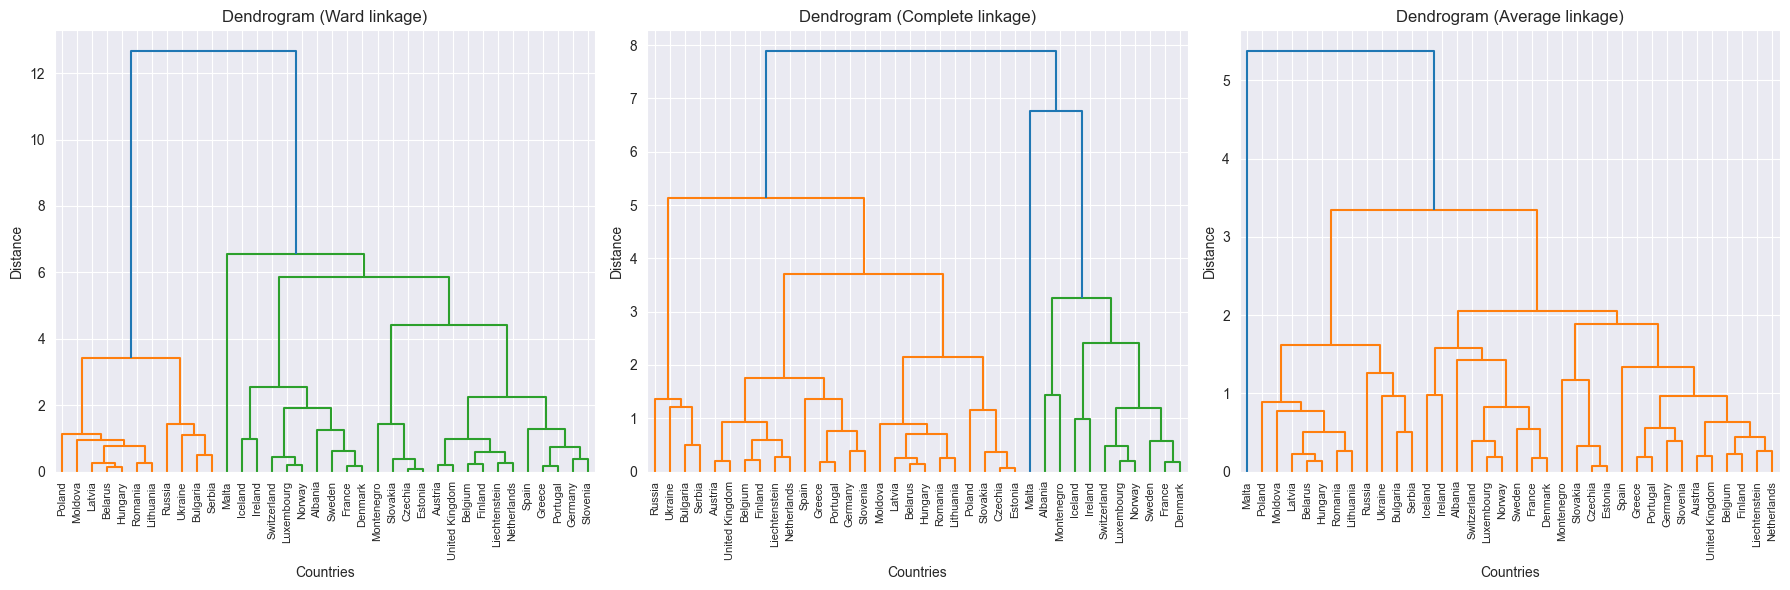

In [10]:
# Create three different linkage methods
Z_ward = linkage(pca_new, method='ward')
Z_complete = linkage(pca_new, method='complete')
Z_average = linkage(pca_new, method='average')

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Plot Ward linkage
axes[0].set_title('Dendrogram (Ward linkage)')
dendrogram(Z_ward, labels=country_names.values, leaf_rotation=90, ax=axes[0])
axes[0].set_xlabel('Countries')
axes[0].set_ylabel('Distance')

# Plot Complete linkage
axes[1].set_title('Dendrogram (Complete linkage)')
dendrogram(Z_complete, labels=country_names.values, leaf_rotation=90, ax=axes[1])
axes[1].set_xlabel('Countries')
axes[1].set_ylabel('Distance')

# Plot Average linkage
axes[2].set_title('Dendrogram (Average linkage)')
dendrogram(Z_average, labels=country_names.values, leaf_rotation=90, ax=axes[2])
axes[2].set_xlabel('Countries')
axes[2].set_ylabel('Distance')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

By seeing the above plots I would finally choose the clustering with ward linkage because dendogram with ward linkage has the clearer seperation of the major clusters and the clusters are evenly distributed compared to the average and complete linkage.

In [19]:
# Get cluster assignments
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number'])
from scipy.cluster.hierarchy import fcluster
max_d = 2
df['Cluster'] = fcluster(Z_ward, max_d, criterion='distance')

# Compare mean values across clusters
# Group by Cluster and calculate mean
cluster_means = numeric_cols.groupby(df['Cluster']).mean()
print(cluster_means)

         birth_rate  death_rate  male_life_expectancy  female_life_expectancy  \
Cluster                                                                         
1          9.357143   14.014286             70.485714               79.157143   
2          8.750000   16.350000             68.550000               76.825000   
3         11.750000    6.350000             81.050000               84.300000   
4         10.514286    8.671429             79.828571               83.957143   
5         10.500000   11.625000             74.050000               80.800000   
6          9.450000    9.933333             79.300000               83.550000   
7          8.280000   11.580000             78.540000               83.940000   
8          8.600000    7.900000             80.800000               84.600000   

           population  population_per_sq_km  Cluster  
Cluster                                               
1        1.194314e+07             71.664286      1.0  
2        5.051800e+07   

I have computed the cluster means at the max_d of 2 to see how the clusters are similar and disimilar to each other.
In cluster two  we see that lowest birth rate and hihgest death rate which might indicates the less medical facilities compared to the other groups. And similarly we see in cluster 3 have highest bith rate and lowest death rate indicating that these countries have good maedical facilites and tends to be developed countries.The countries in the same clusters have the similar birthrate ,death rate , life expectancy compared to the countries in the other clusters.